In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns

### CRUDE OIL PRODUCTION

In [154]:
# Import Crude Oil Production Data
us_oil_data = Path("U.S._crude_oil_production.csv")
cop_df = pd.read_csv(us_oil_data)
cop_df.head()

,Month,U.S. Crude Oil
0,6/1/2008,5138
1,7/1/2008,5177
2,8/1/2008,5003
3,9/1/2008,3974
4,10/1/2008,4738


In [155]:
# Rename Month column to Date
cop_df2 = cop_df.rename(columns={'Month':'Date', 'U.S. Crude Oil ':'U.S. Crude Oil'})
cop_df2.head()

,Date,U.S. Crude Oil
0,6/1/2008,5138
1,7/1/2008,5177
2,8/1/2008,5003
3,9/1/2008,3974
4,10/1/2008,4738


In [156]:
# Set Date column as index
cop_df3 = cop_df2.set_index(pd.to_datetime(cop_df2['Date'], infer_datetime_format=True)).drop(columns=["Date"])
cop_df3.head()

,U.S. Crude Oil
Date,
2008-06-01,5138
2008-07-01,5177
2008-08-01,5003
2008-09-01,3974
2008-10-01,4738


### NATURAL GAS PRODUCTION

In [157]:
# Import Natural Gas Production Data
us_natural_data = Path("U.S._natural_gas_production.csv")
ngp_df = pd.read_csv(us_natural_data)
ngp_df.head()

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,6/1/2008,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,7/1/2008,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,8/1/2008,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,9/1/2008,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,10/1/2008,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [159]:
# Rename Month column to Date and U.S. column to U.S. NG
ngp_df2 = ngp_df.rename(columns={'Month':'Date','U.S.':'U.S. NG'})
ngp_df2.head()

,Date,U.S. NG,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,6/1/2008,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,7/1/2008,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,8/1/2008,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,9/1/2008,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,10/1/2008,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [160]:
# Bring only the Date and U.S. NG columns into a new dataframe
ngp_df3 = ngp_df2[['Date','U.S. NG']]
ngp_df3.head()

,Date,U.S. NG
0,6/1/2008,70626
1,7/1/2008,71137
2,8/1/2008,70760
3,9/1/2008,63984
4,10/1/2008,69464


In [161]:
# Set Date column as index
ngp_df4 = ngp_df3.set_index(pd.to_datetime(cop_df2['Date'], infer_datetime_format=True)).drop(columns=["Date"])
ngp_df4.head()

,U.S. NG
Date,
2008-06-01,70626
2008-07-01,71137
2008-08-01,70760
2008-09-01,63984
2008-10-01,69464


### NATURAL GAS PRICE

In [162]:
# Import Natural Gas Price Data
natural_gas_close = Path("NG1_Data.csv")
ng_df = pd.read_csv(natural_gas_close)
ng_df.head()

,Date,NG1 Open,NG1 Low,NG1 High,NG1 Close,NG1 Adj. Close
0,6/19/2020,1.64,1.63,1.68,1.67,1.67
1,6/18/2020,1.63,1.61,1.66,1.64,1.64
2,6/17/2020,1.61,1.60,1.65,1.63,1.63
3,6/16/2020,1.67,1.60,1.68,1.62,1.62
4,6/15/2020,1.75,1.66,1.75,1.67,1.67


In [163]:
# Drop all columns except Date and NG1 Close
ng_df2 = ng_df.drop(columns=["NG1 Open", "NG1 Low", "NG1 High", "NG1 Adj. Close"])
ng_df2.head()

,Date,NG1 Close
0,6/19/2020,1.67
1,6/18/2020,1.64
2,6/17/2020,1.63
3,6/16/2020,1.62
4,6/15/2020,1.67


In [164]:
# Rename NG1 Close column to NG Price and Date column to Date
ng_df3 = ng_df2.rename(columns={'NG1 Close':'NG Price',' Date':'Date'})
ng_df3.head()

,Date,NG Price
0,6/19/2020,1.67
1,6/18/2020,1.64
2,6/17/2020,1.63
3,6/16/2020,1.62
4,6/15/2020,1.67


In [165]:
# Set Date column as index
ng_df4 = ng_df3.set_index(pd.to_datetime(ng_df3['Date'], infer_datetime_format=True)).drop(columns=["Date"])
ng_df4.head()

,NG Price
Date,
2020-06-19,1.67
2020-06-18,1.64
2020-06-17,1.63
2020-06-16,1.62
2020-06-15,1.67


### CRUDE OIL PRICE

In [166]:
# Import Crude Oil Price data
crude_oil_close = Path("OPEC_ORB.csv")
co_df = pd.read_csv(crude_oil_close)
co_df.head()

,Date,Value
0,6/18/2020,37.70
1,6/17/2020,37.59
2,6/16/2020,36.75
3,6/15/2020,35.09
4,6/12/2020,35.06


In [167]:
# Rename Value column as CO Price and Date column as Date
co_df2 = co_df.rename(columns={'Value':'CO Price',' Date':'Date'})
co_df2.head()

,Date,CO Price
0,6/18/2020,37.70
1,6/17/2020,37.59
2,6/16/2020,36.75
3,6/15/2020,35.09
4,6/12/2020,35.06


In [168]:
# Set Date column as index
co_df3 = co_df2.set_index(pd.to_datetime(co_df2['Date'], infer_datetime_format=True)).drop(columns=["Date"])
co_df3.head()

,CO Price
Date,
2020-06-18,37.70
2020-06-17,37.59
2020-06-16,36.75
2020-06-15,35.09
2020-06-12,35.06


### CONCAT THE DATAFRAMES

In [169]:
# Concat the dataframes into one dataframe
joined_df = pd.concat([cop_df3, ngp_df4, ng_df4, co_df3], axis="columns", join="inner")
joined_df.head()

,U.S. Crude Oil,U.S. NG,NG Price,CO Price
Date,,,,
2008-07-01,5177,71137,13.51,136.94
2008-08-01,5003,70760,9.39,121.08
2008-09-01,3974,63984,8.24,110.01
2008-10-01,4738,69464,7.73,89.99
2008-12-01,5103,71840,6.60,45.26


In [125]:
# Reorder joined dataframe
joined_df = joined_df[["CO Price", "NG Price", "U.S. Crude Oil", "U.S. NG"]]
joined_df.head()

,CO Price,NG Price,U.S. Crude Oil,U.S. NG
Date,,,,
2008-07-01,136.94,13.51,5177,71137
2008-08-01,121.08,9.39,5003,70760
2008-09-01,110.01,8.24,3974,63984
2008-10-01,89.99,7.73,4738,69464
2008-12-01,45.26,6.60,5103,71840


In [128]:
# Create new dataframe with just Crude Oil productoin and Natural Gas production data
production_joined = joined_df[["U.S. Crude Oil", "U.S. NG"]]
production_joined.head()

,U.S. Crude Oil,U.S. NG
Date,,
2008-07-01,5177,71137
2008-08-01,5003,70760
2008-09-01,3974,63984
2008-10-01,4738,69464
2008-12-01,5103,71840


In [135]:
# Create new dataframe with just Crude Oil price and Natural Gas price data
price_joined = joined_df[["CO Price", "NG Price"]]
price_joined.head()

,CO Price,NG Price
Date,,
2008-07-01,136.94,13.51
2008-08-01,121.08,9.39
2008-09-01,110.01,8.24
2008-10-01,89.99,7.73
2008-12-01,45.26,6.60


In [136]:
# Create new dataframe with just Crude Oil price and Crude Oil production data
co_joined=joined_df[["CO Price", "U.S. Crude Oil"]]
co_joined.head()

,CO Price,U.S. Crude Oil
Date,,
2008-07-01,136.94,5177
2008-08-01,121.08,5003
2008-09-01,110.01,3974
2008-10-01,89.99,4738
2008-12-01,45.26,5103


In [137]:
# Create new dataframe with just Natural Gas price and Natural Gas production data
ng_joined = joined_df[["NG Price", "U.S. NG"]]
ng_joined.head()

,NG Price,U.S. NG
Date,,
2008-07-01,13.51,71137
2008-08-01,9.39,70760
2008-09-01,8.24,63984
2008-10-01,7.73,69464
2008-12-01,6.60,71840


### CORRELATION OF CRUDE OIL PRICE TO NATURAL GAS PRICE

In [133]:
# Correlate Crude Oil price and Natural Gas price data
correlation_price = price_joined.corr()
correlation_price

,CO Price,NG Price
CO Price,1.000000,0.453687
NG Price,0.453687,1.000000


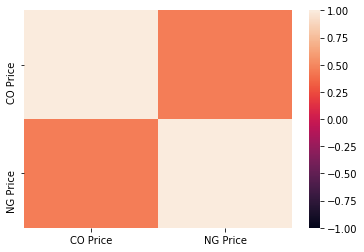

In [134]:
# Create a heatmap for Crude Oil price and Natural Gas price correlation
sns.heatmap(correlation_price, vmin=-1, vmax=1)

### CORRELATION OF CRUDE OIL PRICE TO CRUDE OIL PRODUCTION

In [138]:
# Correlate Crude Oil price and Crude Oil production data
correlation_co = co_joined.corr()
correlation_co

,CO Price,U.S. Crude Oil
CO Price,1.000000,-0.478948
U.S. Crude Oil,-0.478948,1.000000


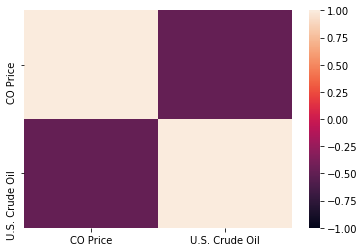

In [139]:
# Create a heatmap for Crude Oil price and Crude Oil production correlation
sns.heatmap(correlation_co, vmin=-1, vmax=1)

### CORRELATION OF CRUDE OIL PRODUCTION TO NATURAL GAS PRODUCTION

In [146]:
# Correlate Crude Oil production and Natural Gas production data
correlation_production = production_joined.corr()
correlation_production

,U.S. Crude Oil,U.S. NG
U.S. Crude Oil,1.000000,0.960909
U.S. NG,0.960909,1.000000


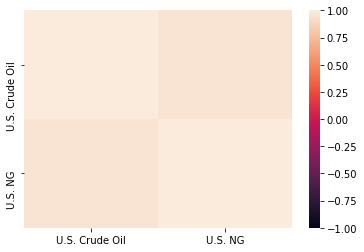

In [147]:
# Create a heatmap for Crude Oil production and Natural Gas production correlation
sns.heatmap(correlation_production, vmin=-1, vmax=1)

### CORRELATION OF NATURAL GAS PRICE TO NATURAL GAS PRODUCTION

In [148]:
# Correlate Natural Gas price and Natural Gas production data
correlation_ng = ng_joined.corr()
correlation_ng

,NG Price,U.S. NG
NG Price,1.000000,-0.578571
U.S. NG,-0.578571,1.000000


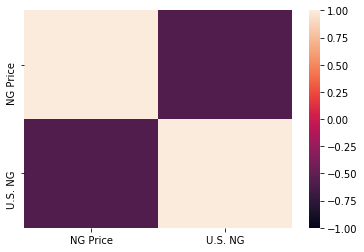

In [149]:
# Create a heatmap for Natural Gas price and Natural Gas production correlation
sns.heatmap(correlation_ng, vmin=-1, vmax=1)